In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [1]:
import opendatasets as od
link = 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data'
od.download(link)

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:19<00:00, 3.48MB/s]


In [2]:
data = pd.read_csv('creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, data was not  provided with the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [3]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check for missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


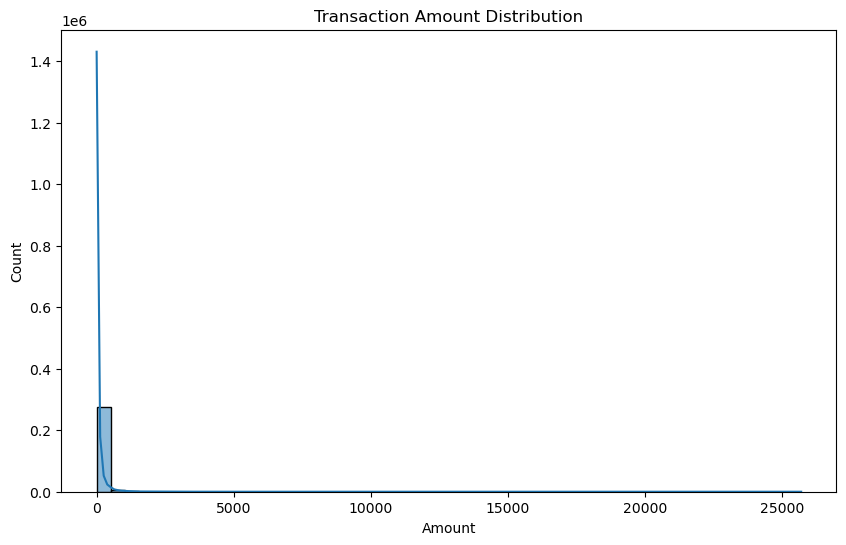

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


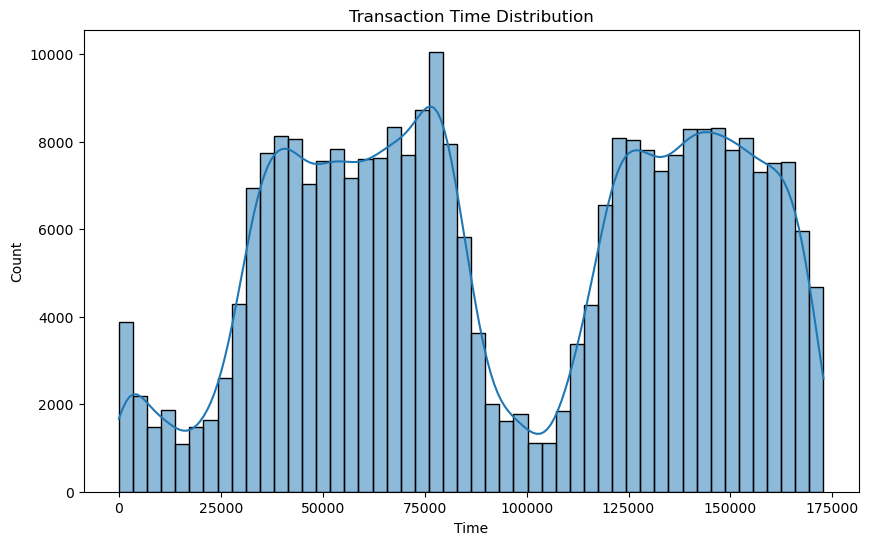

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Histogram of transaction time
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


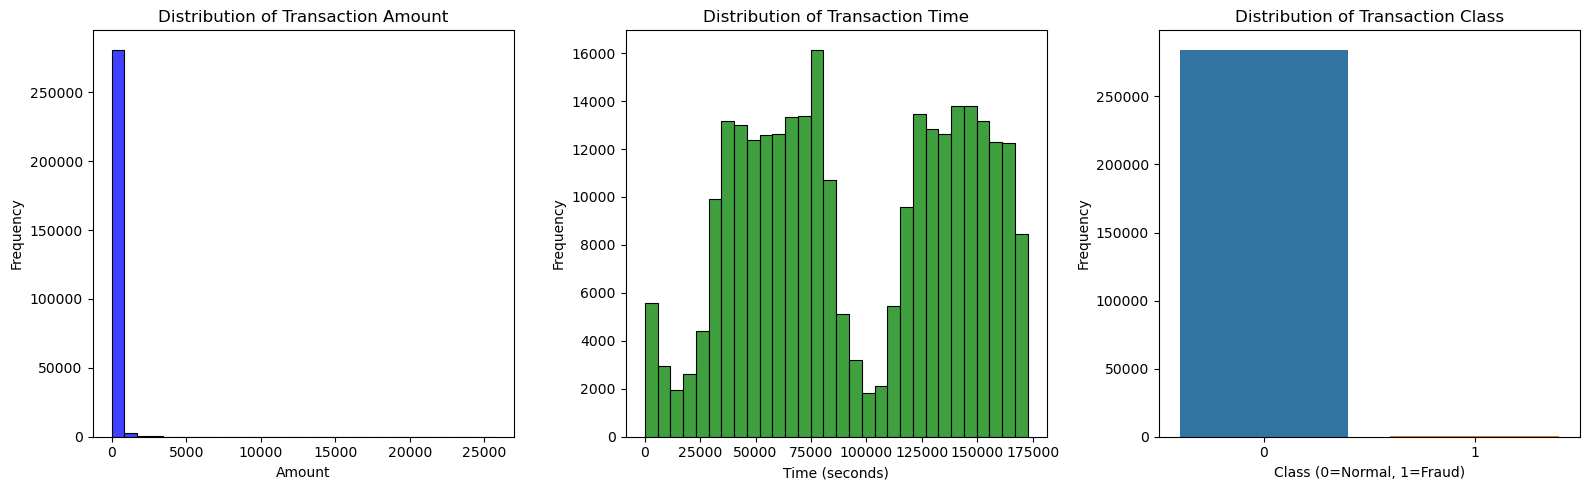

In [6]:
# Set up the figure size and style
plt.figure(figsize=(16, 5))

# Plot distribution of 'Amount'
plt.subplot(1, 3, 1)
sns.histplot(data['Amount'], bins=30, kde=False, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Plot distribution of 'Time'
plt.subplot(1, 3, 2)
sns.histplot(data['Time'], bins=30, kde=False, color='green')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

# Plot distribution of 'Class'
plt.subplot(1, 3, 3)
sns.countplot(x='Class', data=data)
plt.title('Distribution of Transaction Class')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

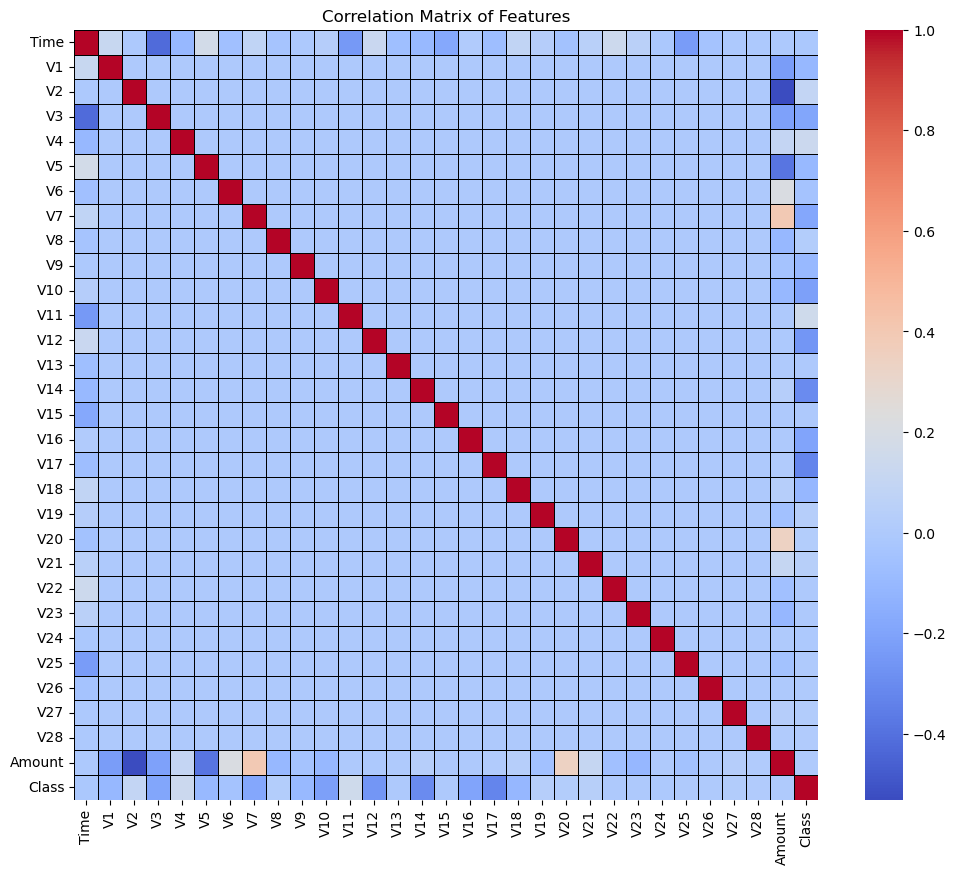

In [7]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Features')
plt.show()


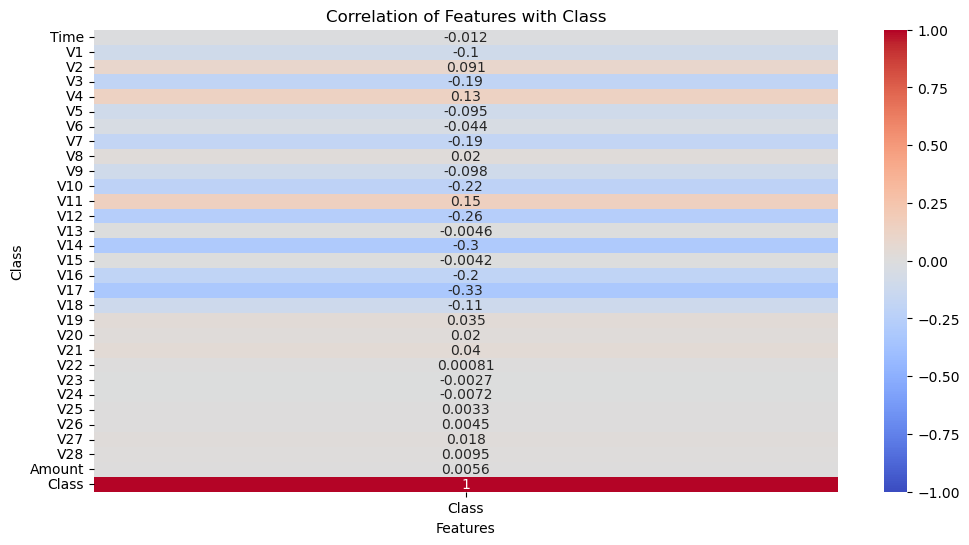

In [8]:
correlation_matrix = data.corr()

# focus on the correlation with the target variable 'Class'
class_correlation = correlation_matrix[['Class']]

plt.figure(figsize=(12, 6))
sns.heatmap(class_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation of Features with Class') 
plt.xlabel('Features')
plt.ylabel('Class')
plt.show()

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

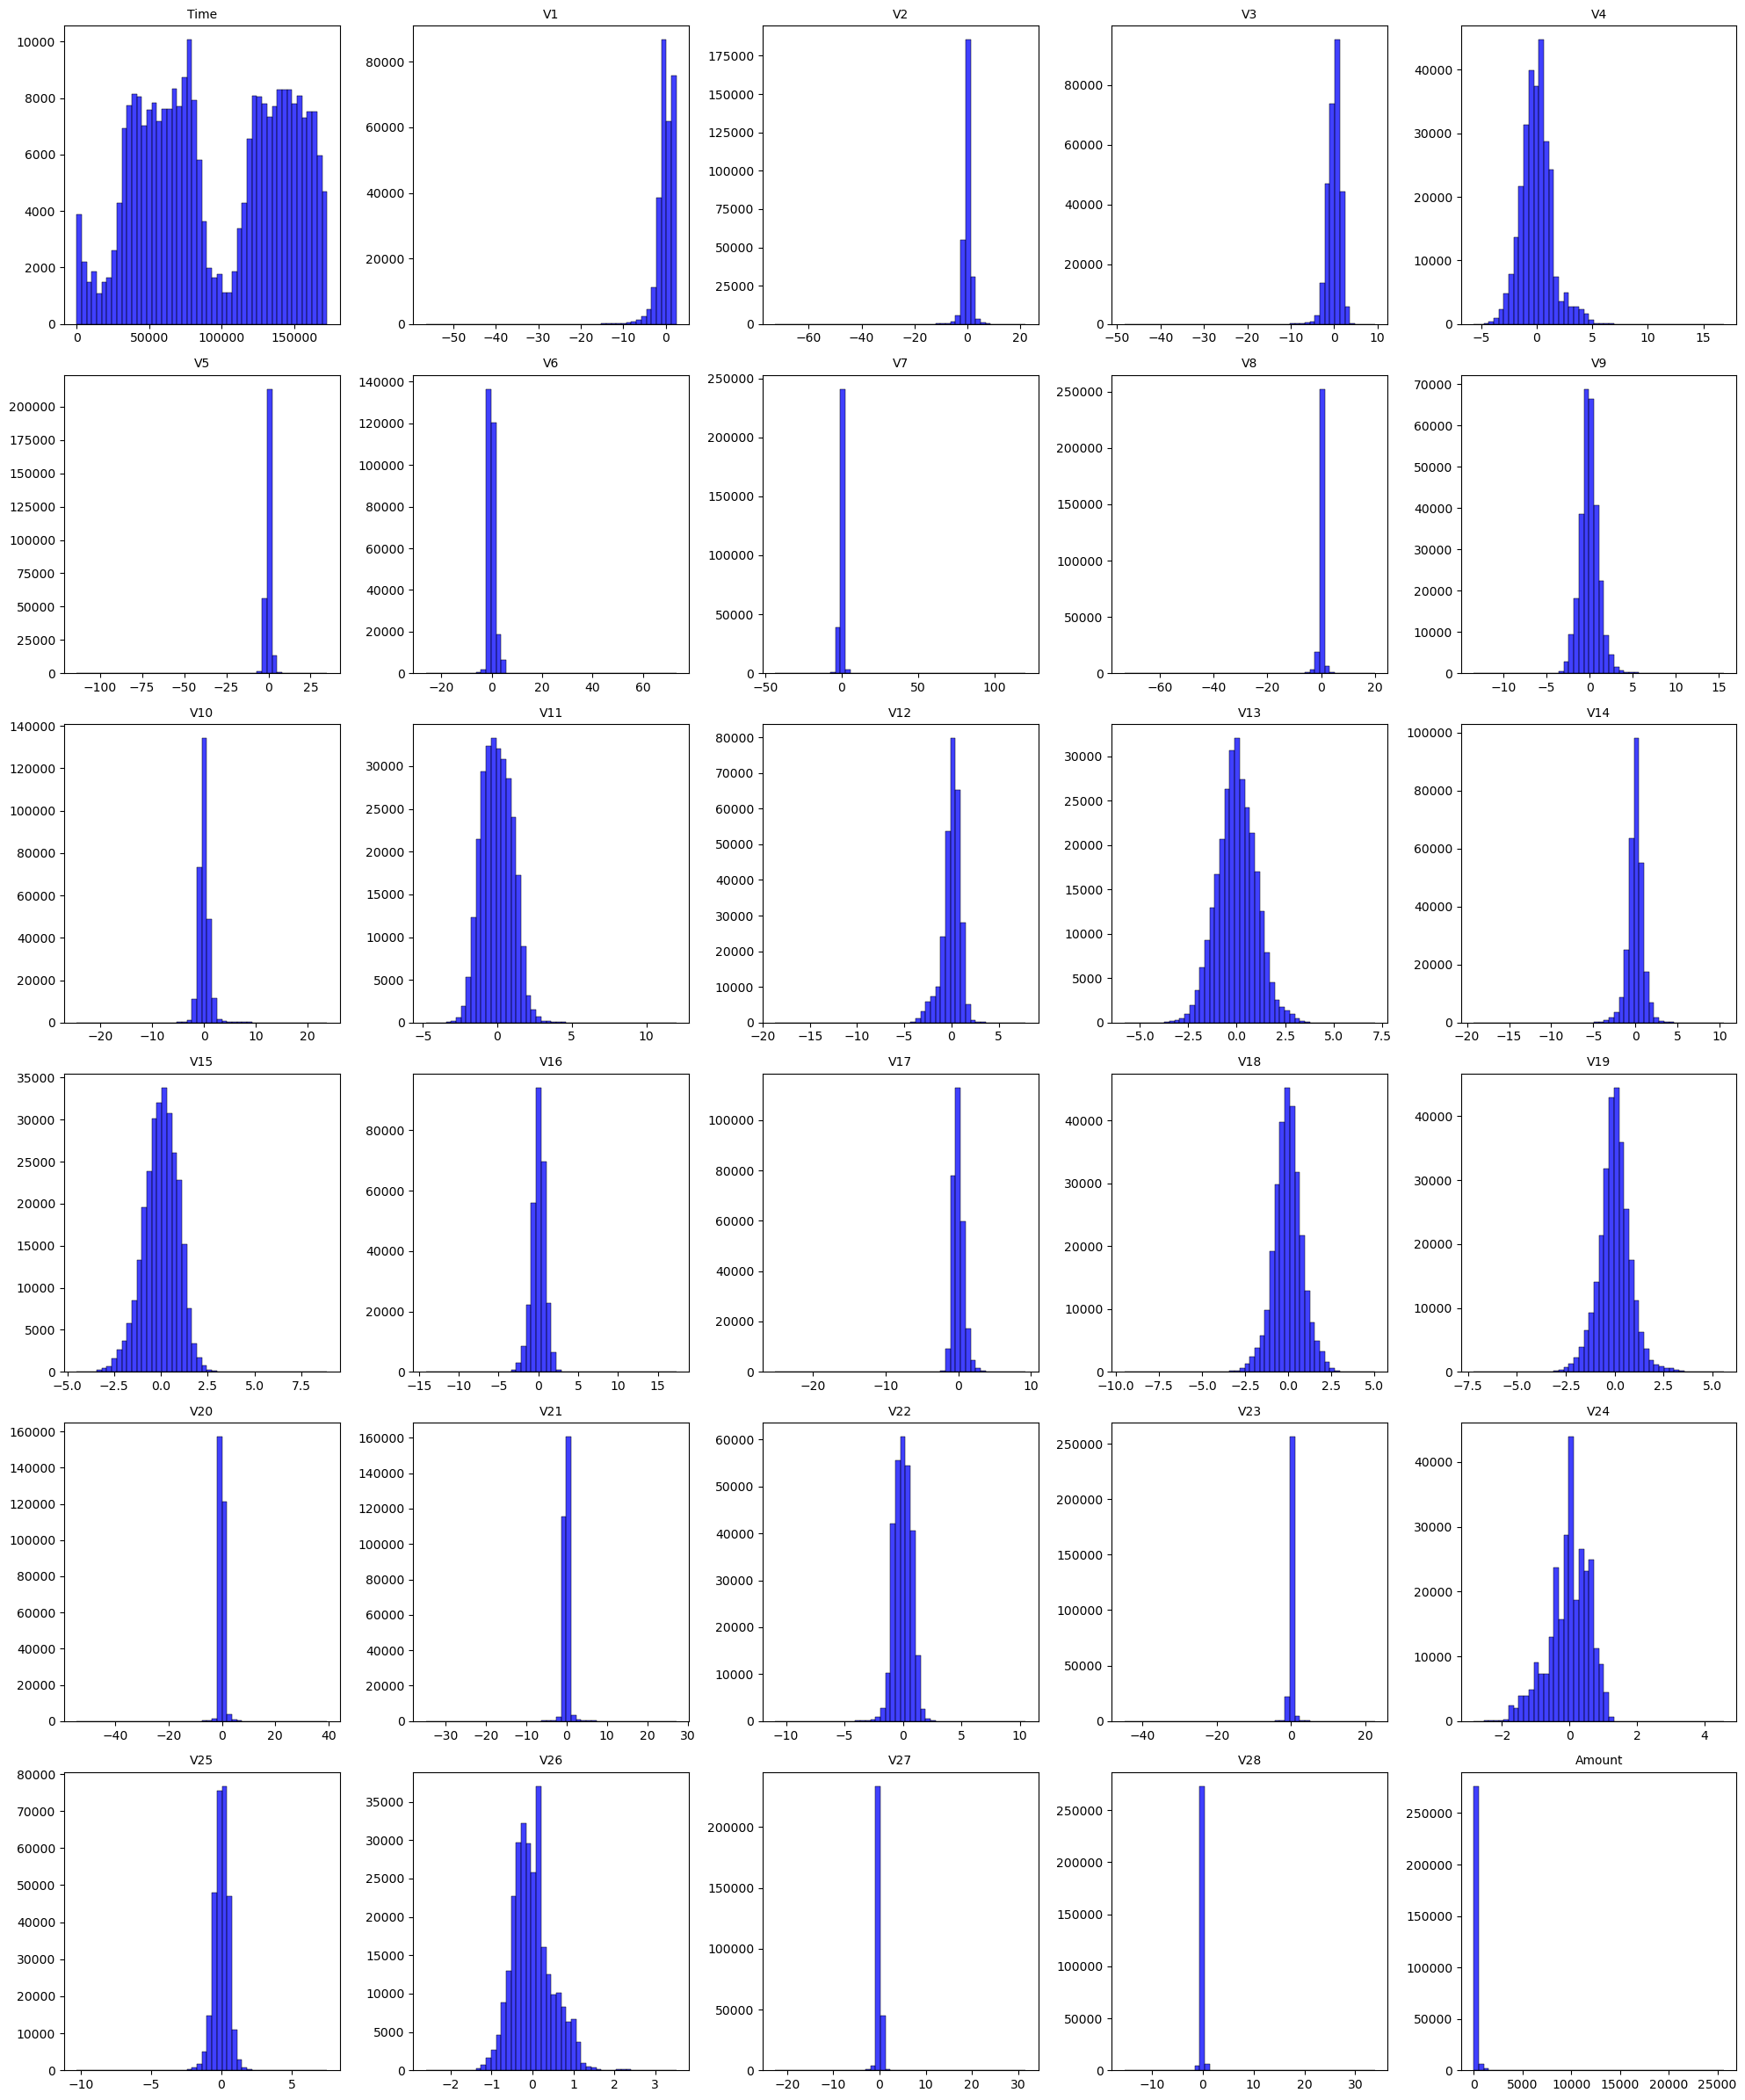

In [9]:
# Number of rows and columns in the subplot
num_rows = 6
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 24))

# Flatten the axis array.
ax = ax.flatten()

for i, col in enumerate(data.columns[:-1]): # Exclude 'Class' from this plot
    sns.histplot(data[col], bins=50, ax=ax[i], kde=False, color='blue')
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove empty subplots
for i in range(len(data.columns)-1, num_rows*num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

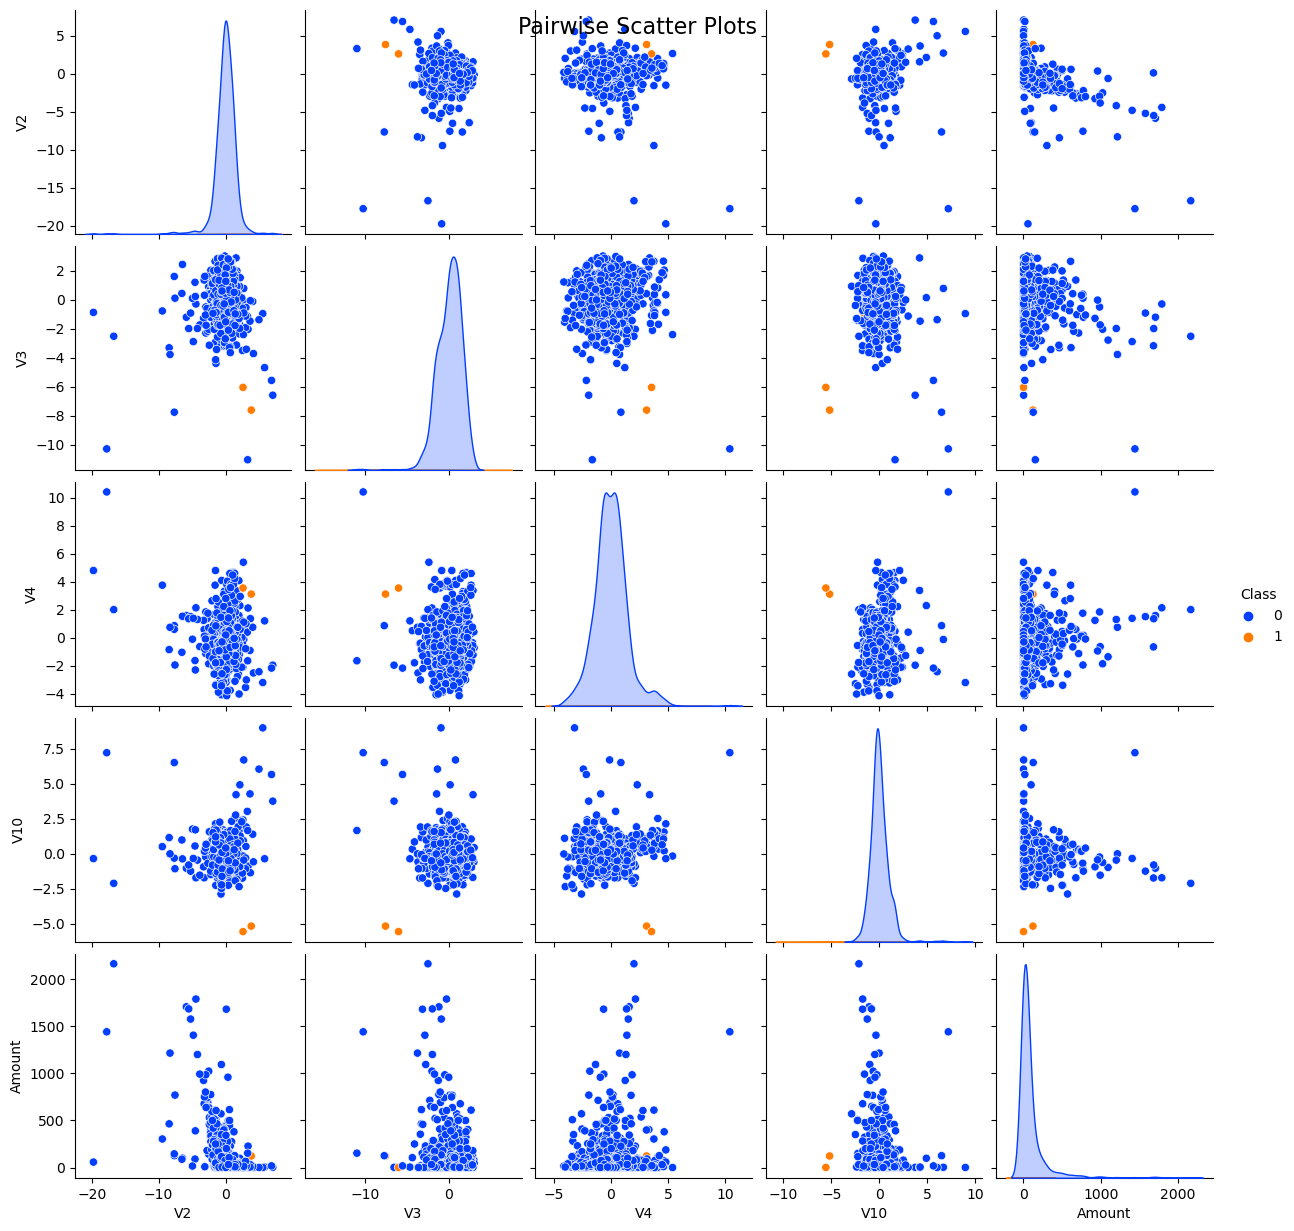

In [10]:
# Filter data to reduce plot density
sampled_data = data.sample(n=1000, random_state=1)

# Select features based on interesting patterns or correlations
features_to_plot = ['V2', 'V3', 'V4', 'V10', 'Amount']

sns.pairplot(sampled_data, vars=features_to_plot, hue='Class', palette='bright')
plt.suptitle('Pairwise Scatter Plots', size=16)
plt.show()


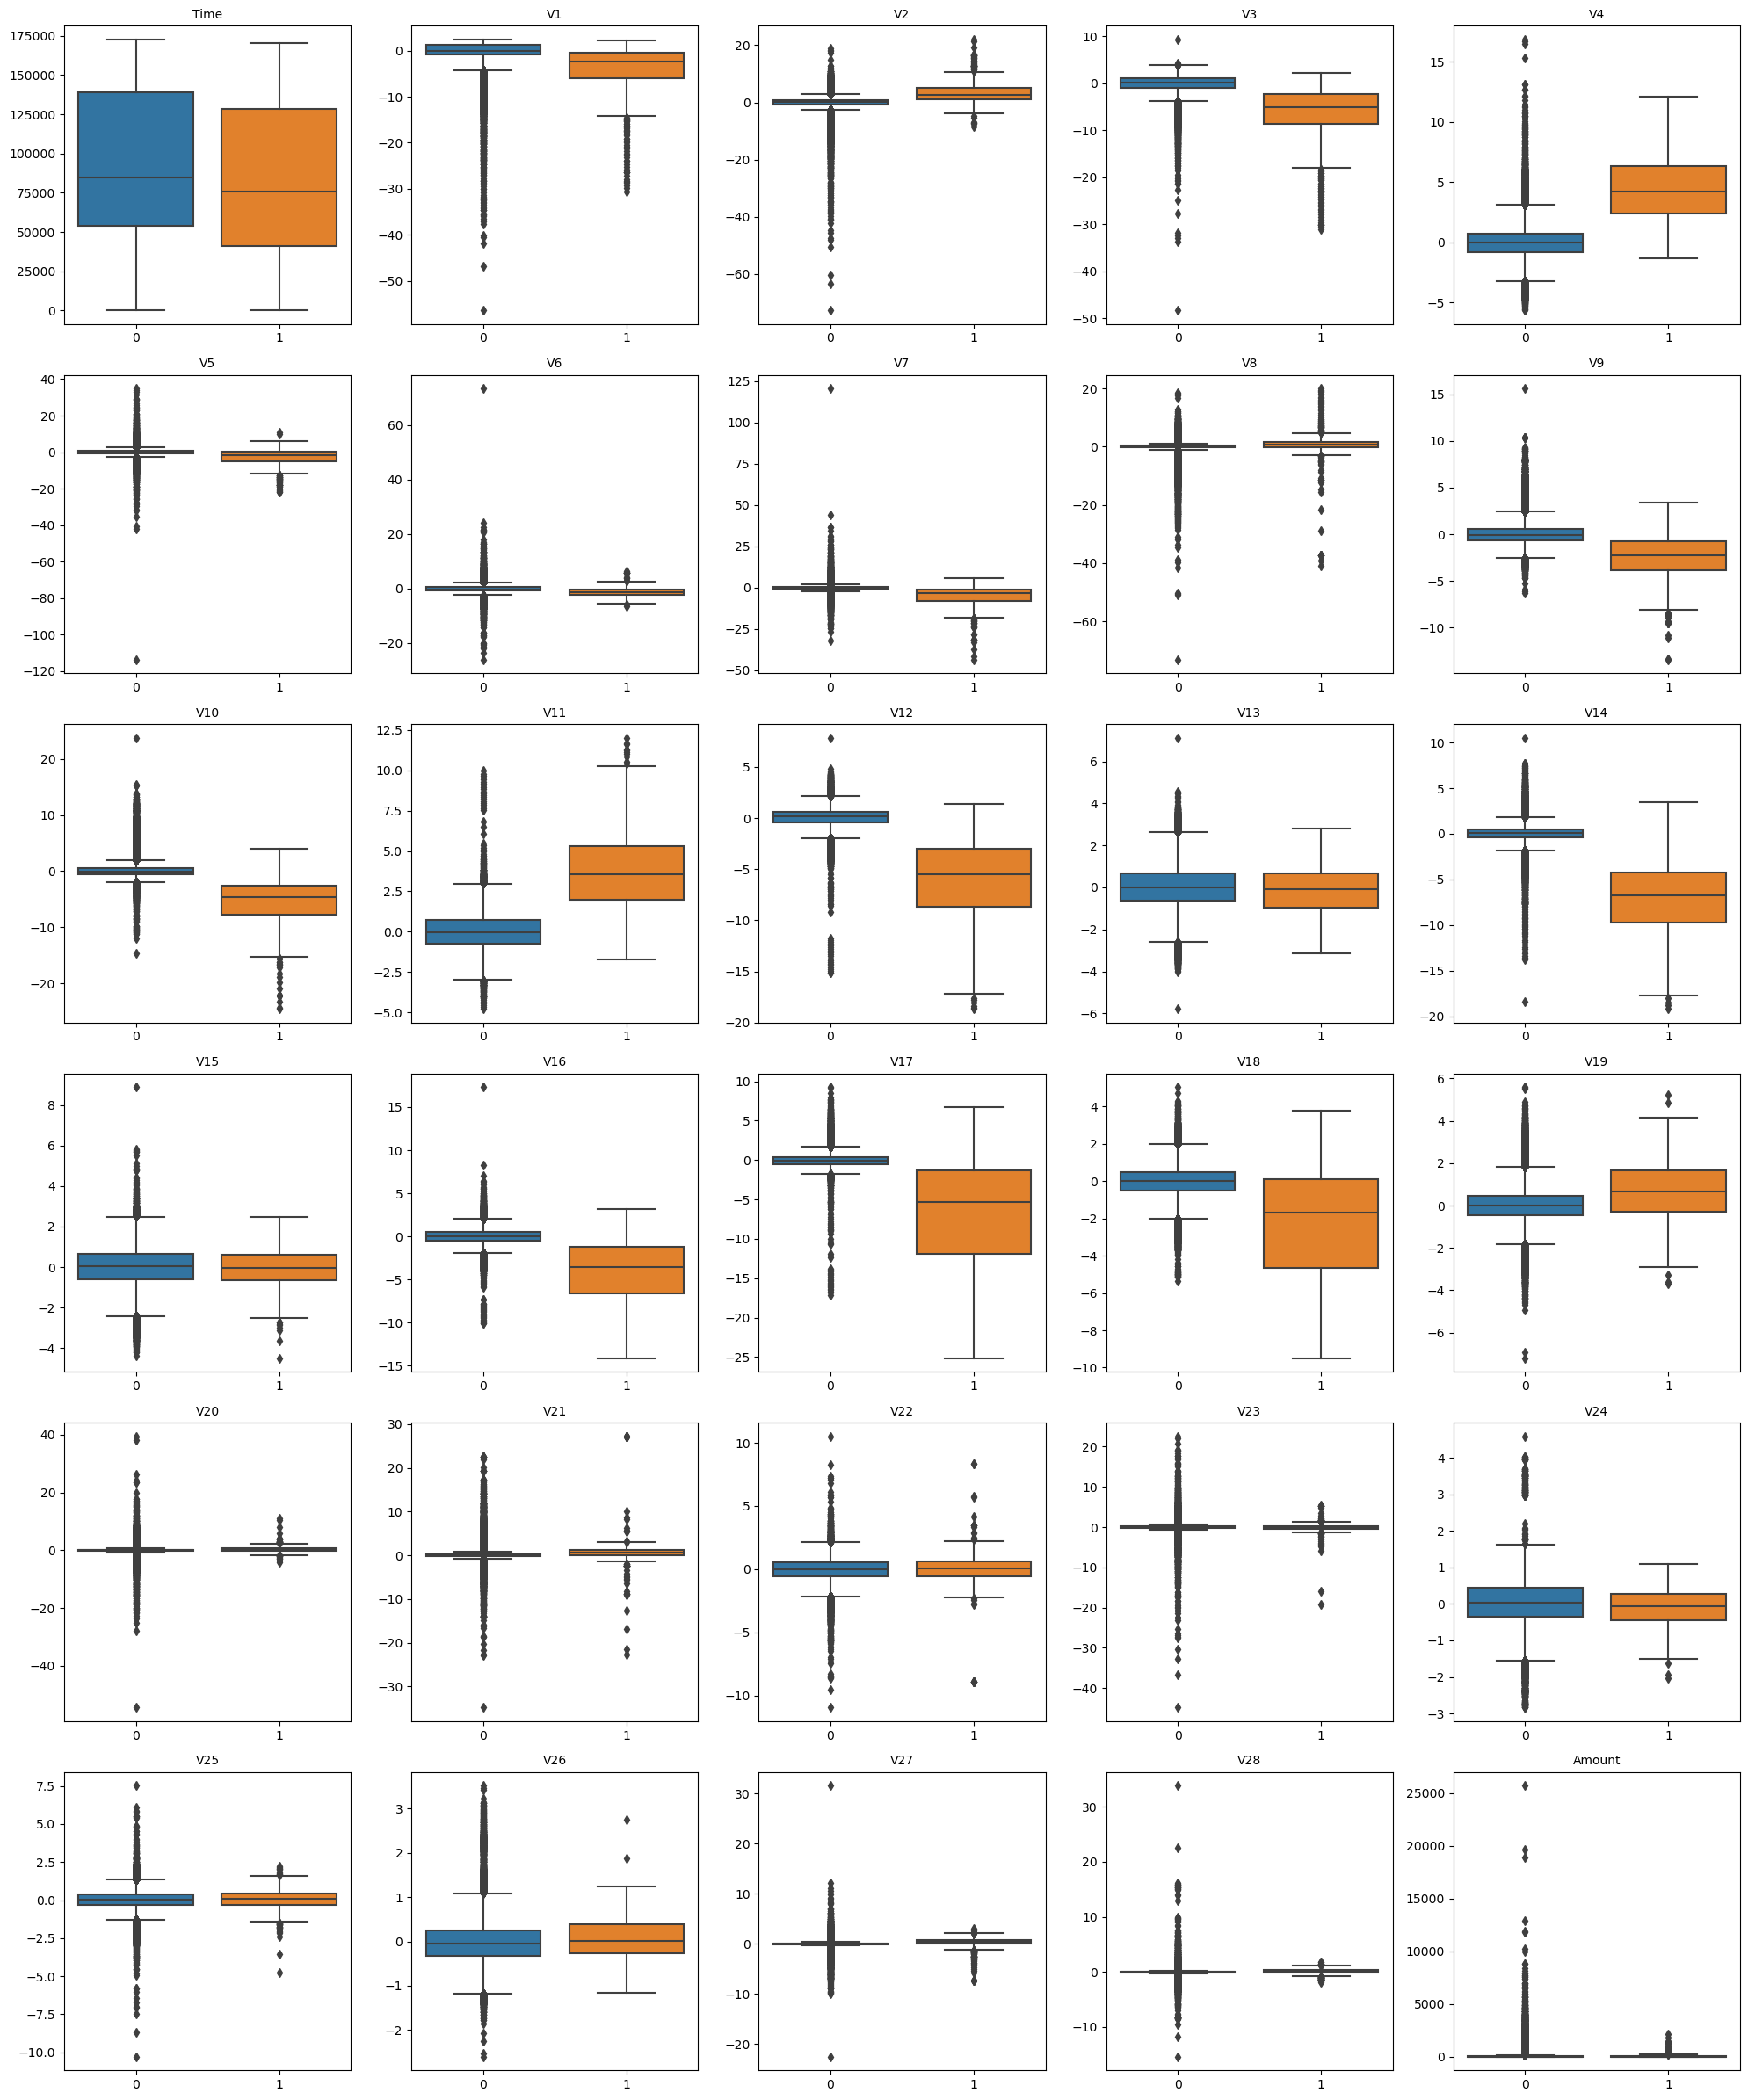

In [11]:

# Number of rows and columns in the subplot
num_rows = 6
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 24))

# Flatten the axis array.
ax = ax.flatten()

for i, col in enumerate(data.columns[:-1]): # Exclude 'Class'
    sns.boxplot(x='Class', y=col, data=data, ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove empty subplots
for i in range(len(data.columns)-1, num_rows*num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


In [12]:
# find outliers in all columns
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

threshold = 1.5

outliers = ((data < (q1 - threshold * iqr)) | (data > (q3 + threshold * iqr))).sum()

outliers_count = outliers[outliers > 0].sum()
print(outliers_count)

370864


C:\Users\ammar\AppData\Local\Temp\ipykernel_6504\3594915645.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 0][feature], label='Normal', shade=True, ax=axes[i])
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ammar\AppData\Local\Temp\ipykernel_6504\3594915645.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 1][feature], label='Fraud', shade=True, ax=axes[i])
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na optio

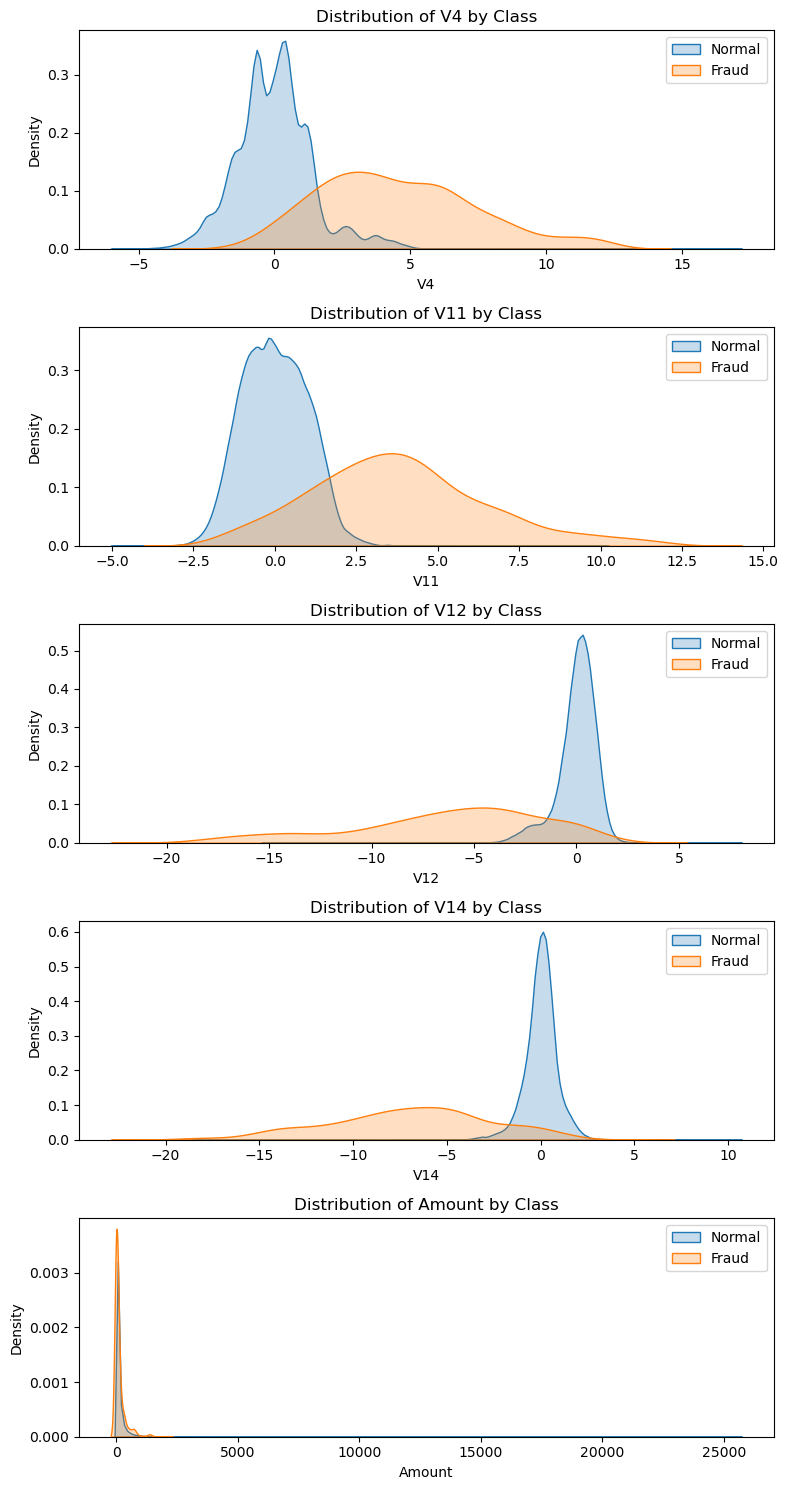

In [13]:
# Plot kernel density estimation plots for some selected features
selected_features = ['V4', 'V11', 'V12', 'V14', 'Amount']
num_plots = len(selected_features)
fig, axes = plt.subplots(nrows=num_plots, figsize=(8, num_plots*3))

for i, feature in enumerate(selected_features):
    sns.kdeplot(data=data[data['Class'] == 0][feature], label='Normal', shade=True, ax=axes[i])
    sns.kdeplot(data=data[data['Class'] == 1][feature], label='Fraud', shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')
    axes[i].legend()

plt.tight_layout()
plt.show()


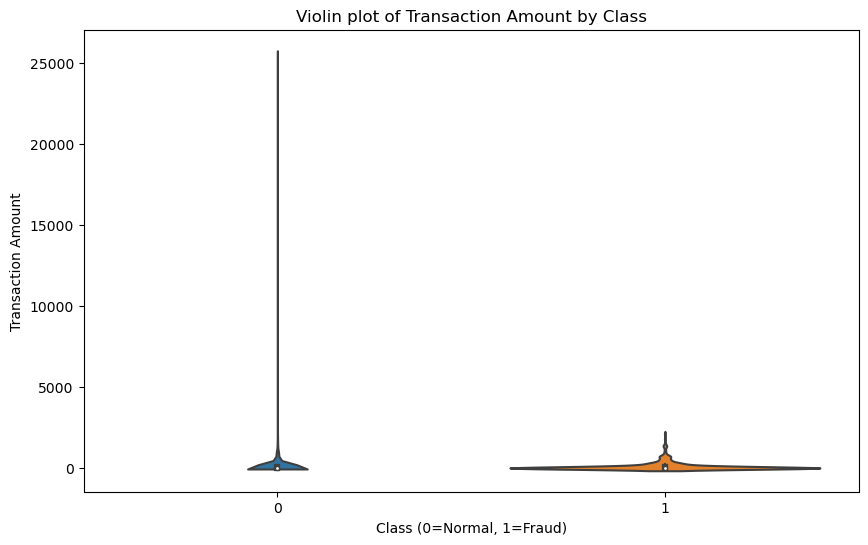

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=data)
plt.title('Violin plot of Transaction Amount by Class')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


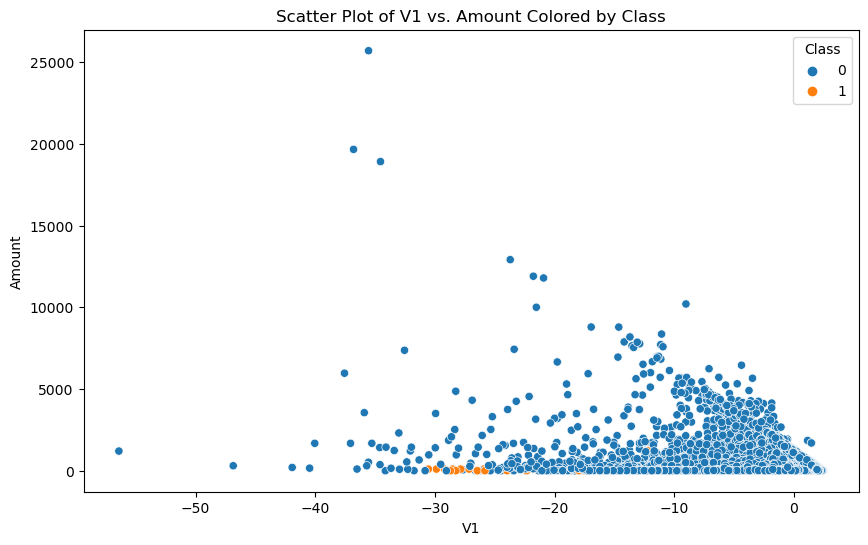

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

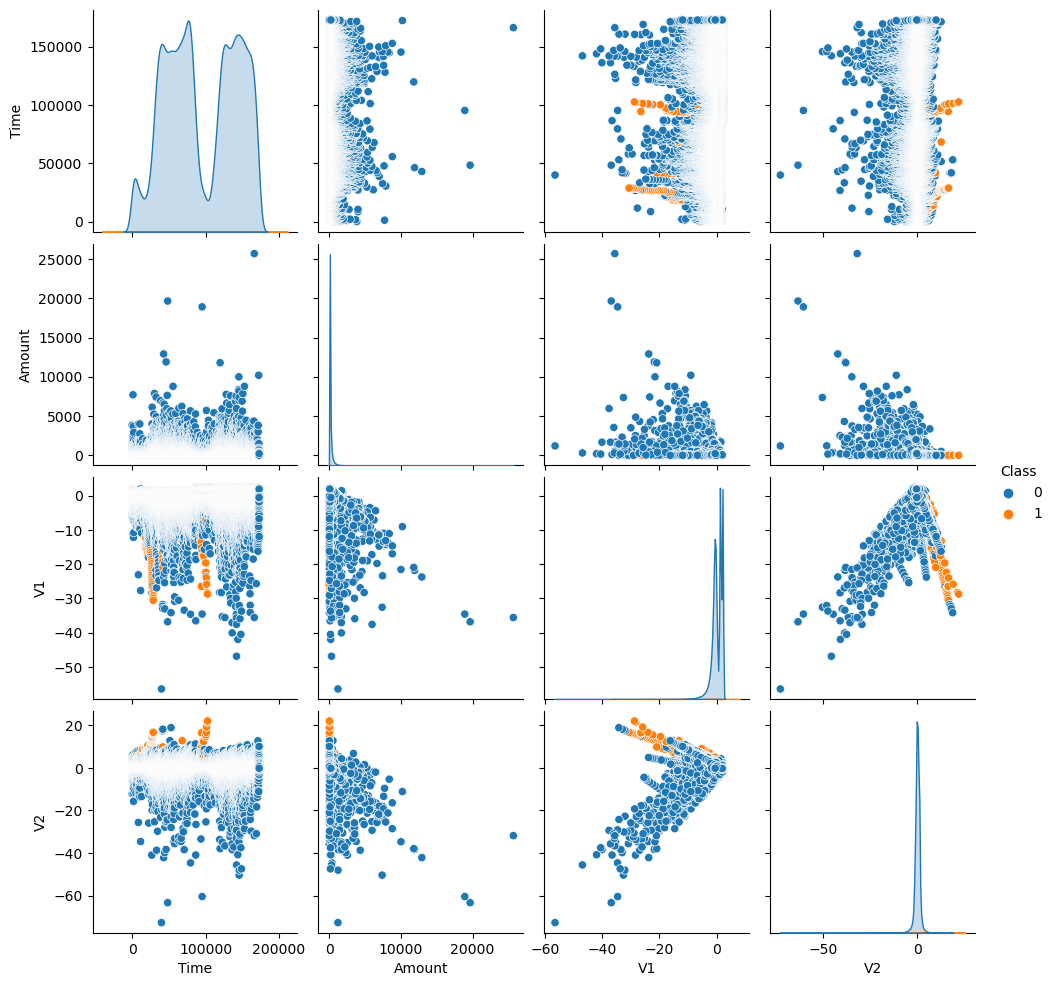

In [15]:
# Scatter plot for selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='Amount', hue='Class', data=data)
plt.title('Scatter Plot of V1 vs. Amount Colored by Class')
plt.show()

# Pair plot of selected features
sns.pairplot(data[['Time', 'Amount', 'V1', 'V2', 'Class']], hue='Class')
plt.show()


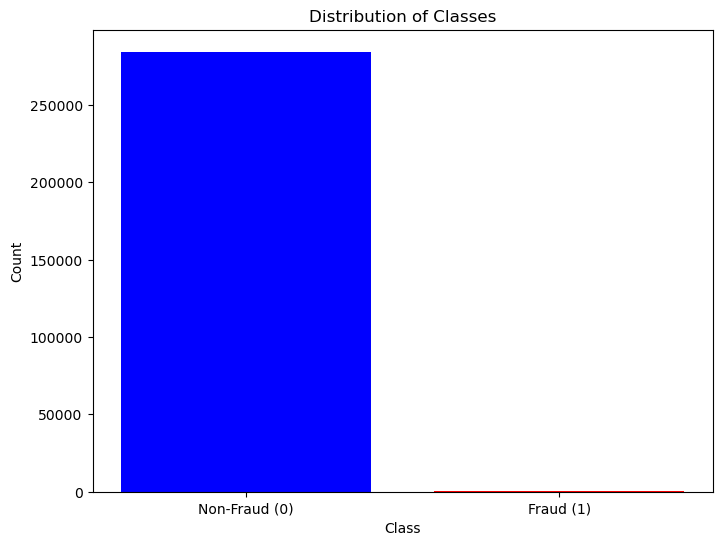

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = data['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


In [17]:
import pandas as pd


class_counts = data['Class'].value_counts()

# Display the counts
print("Frequency of each class in the 'Class' attribute:")
print(class_counts)


Frequency of each class in the 'Class' attribute:
Class
0    284315
1       492
Name: count, dtype: int64


In [18]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


# Handle Outliers

In [19]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler()

# Selecting numerical features which are not 'Class'
features = data.columns[:-1]  # Assuming 'Class' is the last column

# Apply RobustScaler to all numerical features
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])

# Optionally, check the scaled data
print(data_scaled.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -0.616237 -0.098602  1.228905  0.878152 -0.217859  0.631245   
1 -0.994983  0.524929  0.143100 -0.006970  0.293974  0.087726  0.164395   
2 -0.994972 -0.615587 -1.002407  0.830932  0.251024 -0.344345  1.778007   
3 -0.994972 -0.440239 -0.178789  0.841250 -0.529808  0.033775  1.303832   
4 -0.994960 -0.526089  0.579239  0.713861  0.265632 -0.270695  0.317183   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.177406  0.142432  0.334787  ...  0.026866  0.253109 -0.320791  0.032681   
1 -0.105740  0.117064 -0.164482  ... -0.473332 -0.602719  0.363442 -0.479557   
2  0.668164  0.420388 -1.179796  ...  0.668917  0.714254  2.974603 -0.919589   
3  0.175637  0.662489 -1.076888  ... -0.190105 -0.001408 -0.578786 -1.531963   
4  0.491625 -0.546463  0.700808  ...  0.048266  0.739092 -0.407980  0.126293   

        V25       V26       V27       V28    Amount  Class  
0  0.16

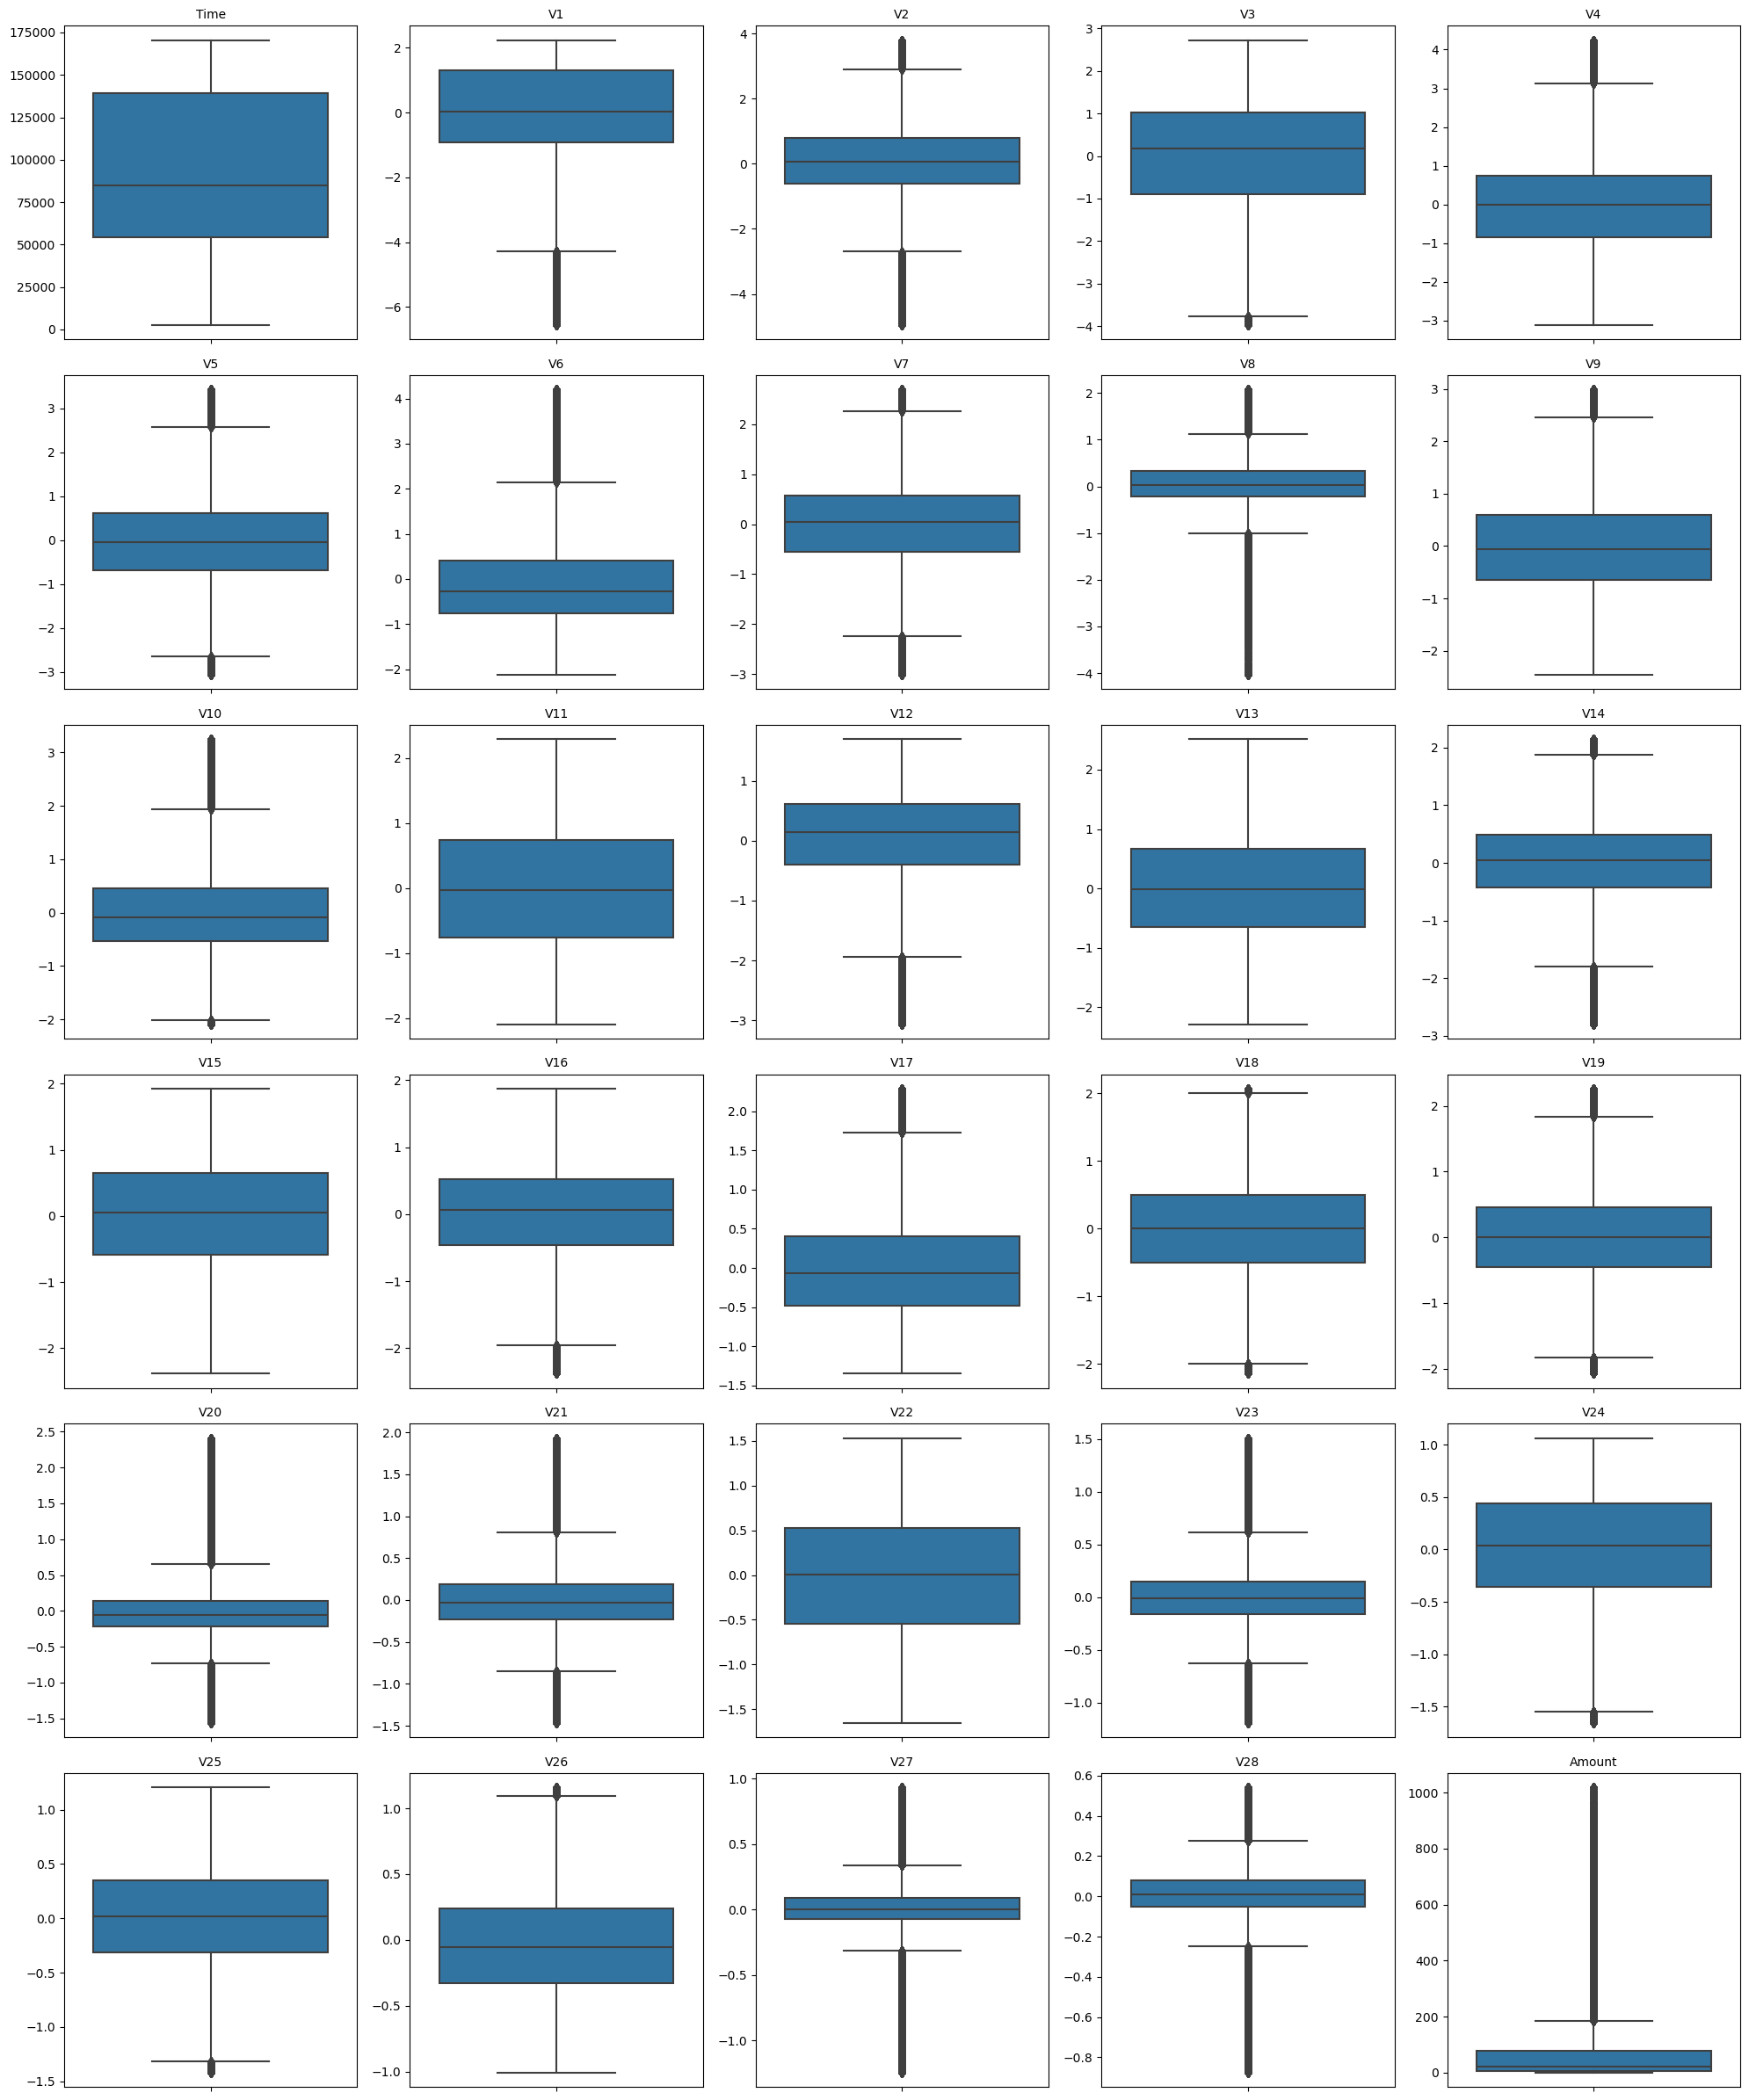

In [20]:
# import winsorize from scipy.stats
from scipy.stats.mstats import winsorize

# Winsorizing all numerical features
for column in data.columns[:-1]:  # Assuming 'Class' is the last column
    data[column] = winsorize(data[column], limits=[0.01, 0.01])

# Calculate the number of rows and columns for the subplots
num_features = len(data.columns[:-1])  # Exclude 'Class'
num_cols = 5  # You can adjust this number based on your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Ensures enough rows to handle all features

# Set up the figure size
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

# Flatten the axis array.
ax = ax.flatten()

# Generate box plots for each winsorized feature
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove unused subplots if any
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

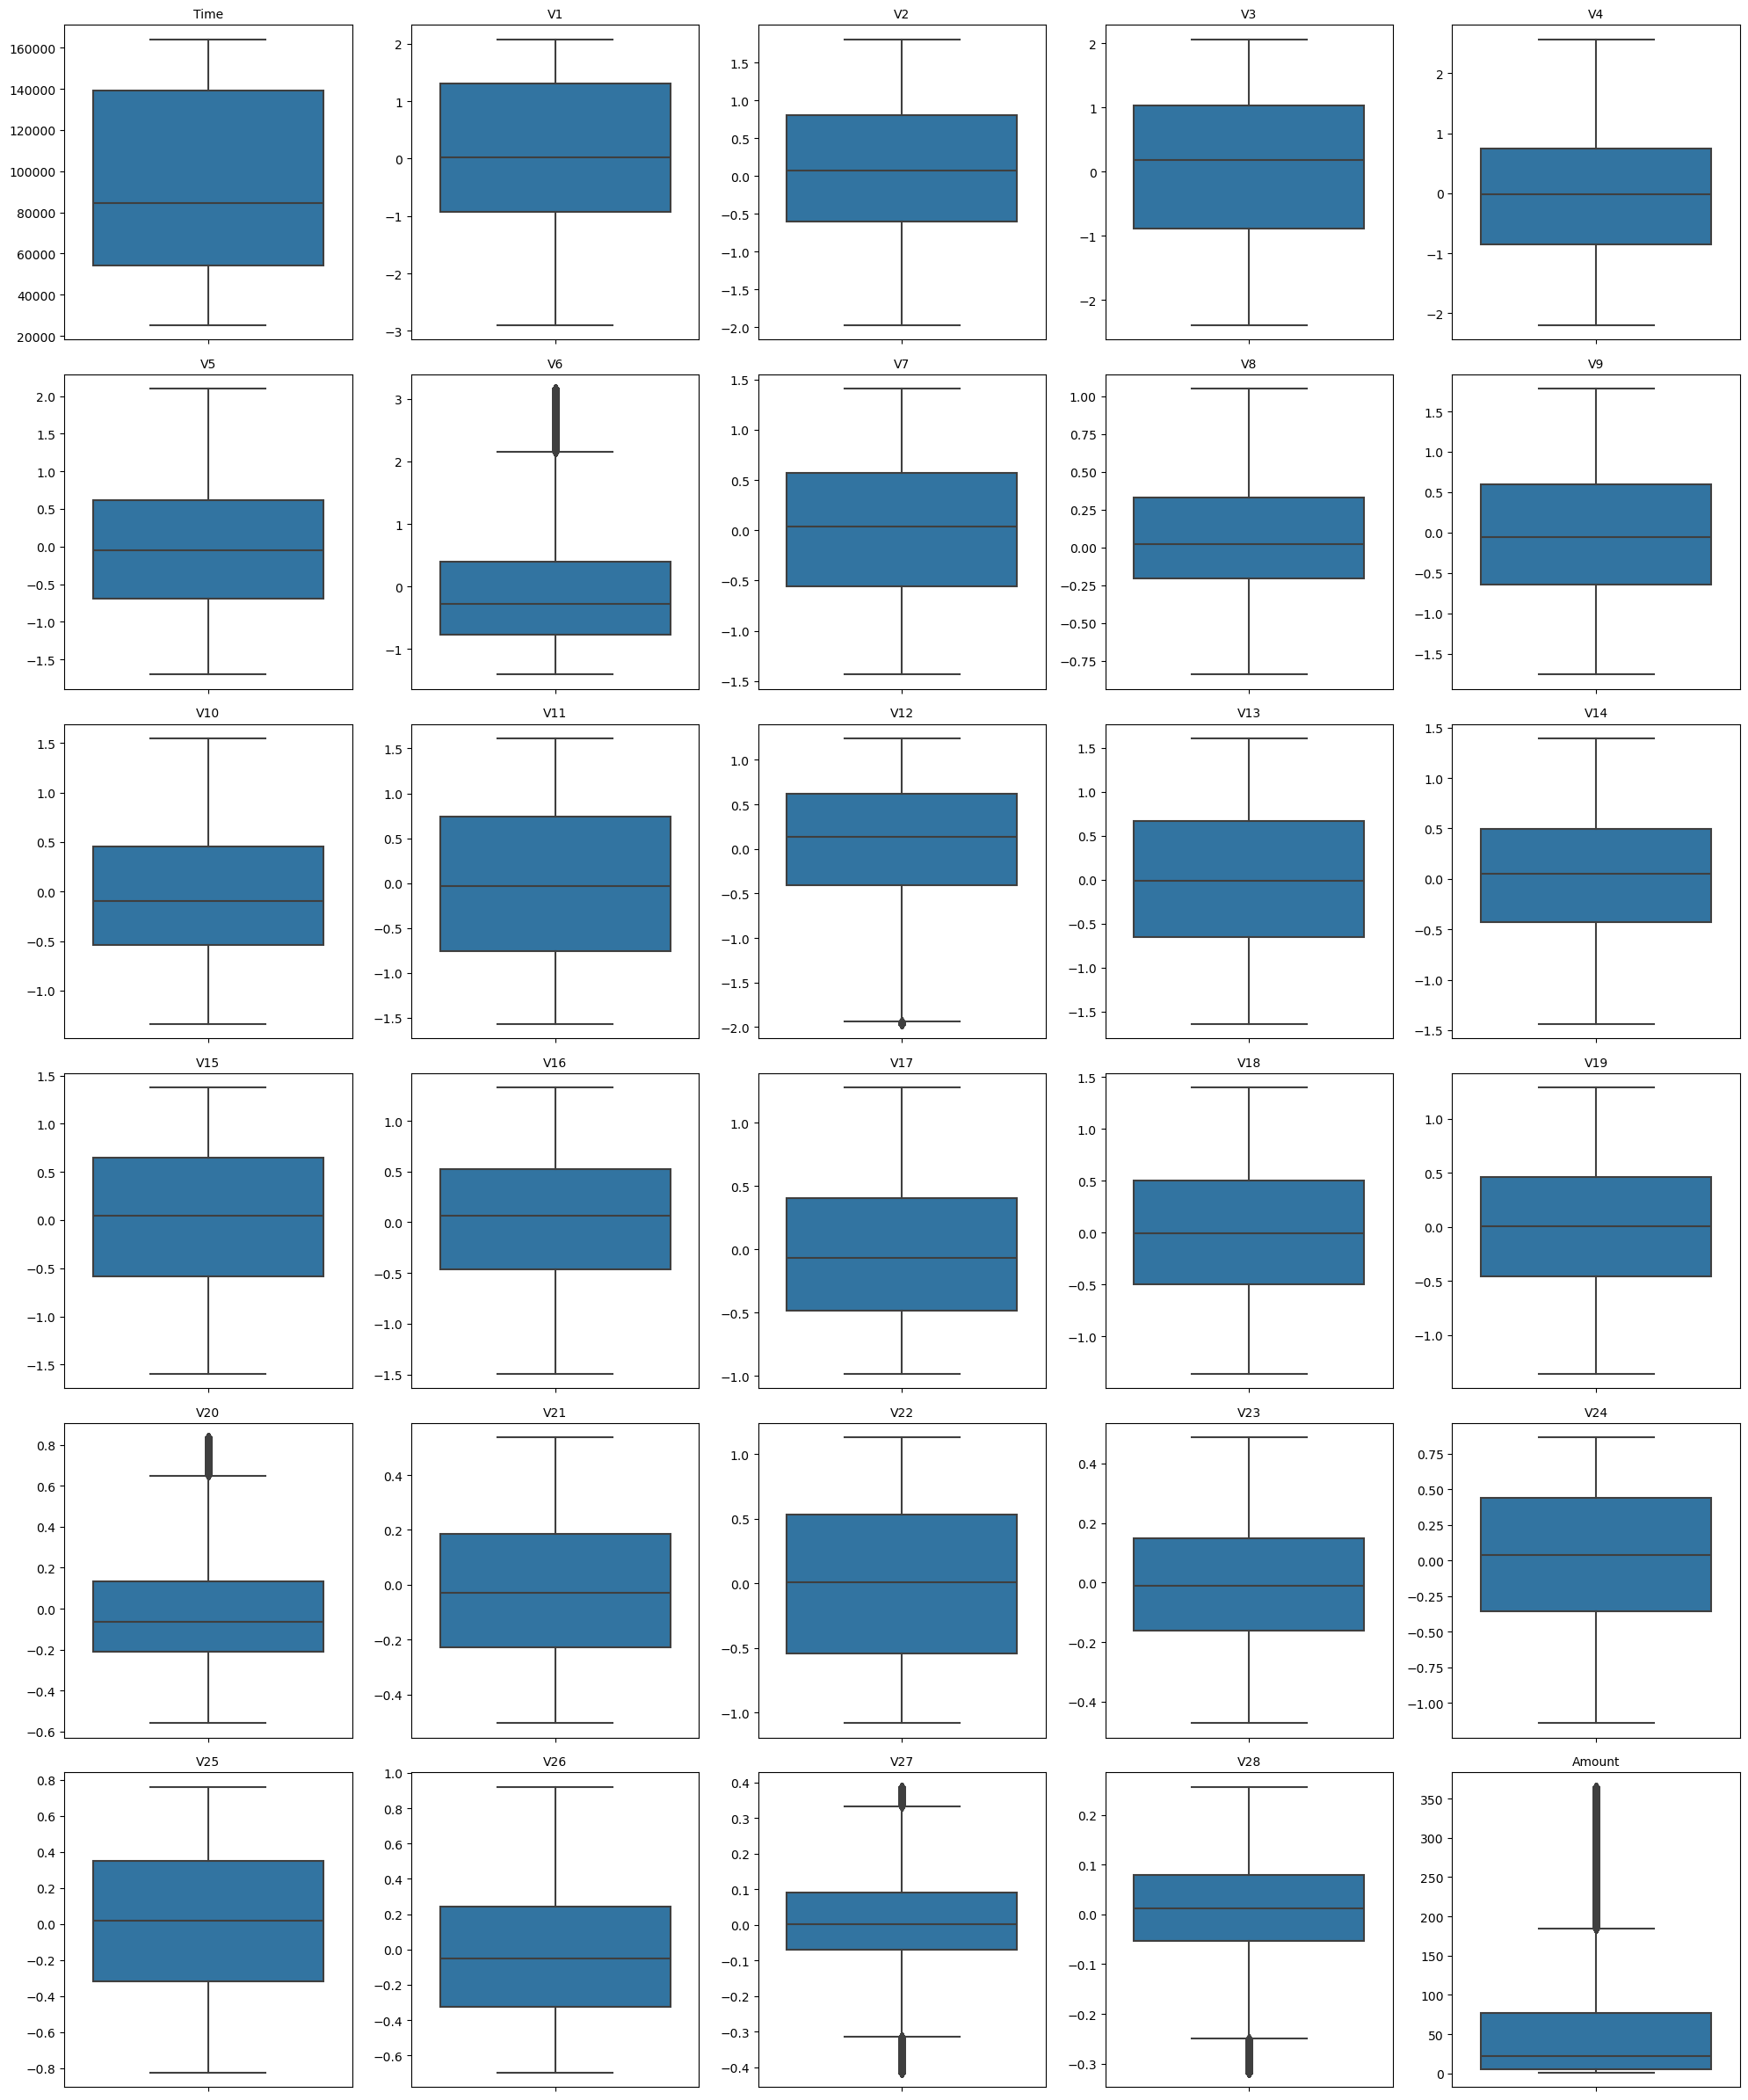

In [21]:
from scipy.stats.mstats import winsorize

# Applying more aggressive Winsorizing to each feature
for column in data.columns[:-1]:  # Assuming 'Class' is the last column
    data[column] = winsorize(data[column], limits=[0.05, 0.05])  # Adjusting limits to 5%

# Plotting the box plots again to check the effect
num_features = len(data.columns[:-1])  # Exclude 'Class'
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
ax = ax.flatten()
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()


In [22]:
print("Distribution in the full dataset:")
print(data['Class'].value_counts())

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nDistribution in the training set:")
print(y_train.value_counts())

print("\nDistribution in the testing set:")
print(y_test.value_counts())


Distribution in the full dataset:
Class
0    284315
1       492
Name: count, dtype: int64

Distribution in the training set:
Class
0    199020
1       344
Name: count, dtype: int64

Distribution in the testing set:
Class
0    85295
1      148
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# paatch sklearn using sklearn-intelx
from sklearnex import patch_sklearn, config_context
patch_sklearn()
import dpctl

# Assuming 'data' is your DataFrame and 'Class' is the target column

# Splitting the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features (optional as data has been winsorized, but typically recommended before modeling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
with config_context(target_offload="gpu:0"):
    log_reg = LogisticRegression()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()

# Training the models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

# Making predictions
log_reg_pred = log_reg.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
gb_pred = gb.predict(X_test_scaled)

# Evaluate the models
models = [log_reg, rf, gb]
predictions = [log_reg_pred, rf_pred, gb_pred]
names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, pred, name in zip(models, predictions, names):
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1-Score:", f1_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("\n")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


ImportError: DLL load failed: The specified module could not be found.

In [3]:
# setup rapids cuML
import dpctl

ImportError: DLL load failed: The specified module could not be found.

In [24]:
# define different hyperparameters for rf, gb, and log_reg
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}

param_grid_log_reg = {
    'penalty': ['l1', 'l2'], # l1 is Lasso, l2 is Ridge
    'C': [0.01, 0.1, 1, 10] # Regularization parameter
}

# Splitting the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features (optional as data has been winsorized, but typically recommended before modeling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=3, n_jobs=-1, scoring='accuracy')

# Training the models
grid_rf.fit(X_train_scaled, y_train)
grid_gb.fit(X_train_scaled, y_train)
grid_log_reg.fit(X_train_scaled, y_train)

# making predictions
grid_rf_pred = grid_rf.predict(X_test_scaled)
grid_gb_pred = grid_gb.predict(X_test_scaled)
grid_log_reg_pred = grid_log_reg.predict(X_test_scaled)

from tqdm import tqdm

progress = tqdm(total=len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) + len(param_grid_gb['n_estimators']) * len(param_grid_gb['learning_rate']) * len(param_grid_gb['max_depth']) + len(param_grid_log_reg['penalty']) * len(param_grid_log_reg['C']) *len(param_grid_rf['max_features']) )

from sklearnex import patch_sklearn
patch_sklearn()

# evaluate the models
models = [grid_rf, grid_gb, grid_log_reg]
names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
predictions = [grid_rf_pred, grid_gb_pred, grid_log_reg_pred]
for model, name, pred in zip(models, names, predictions):
    print(f"Results for {name}:")
    print("Best Parameters:", model.best_params_)
    print("Best Model:", model.best_estimator_)
    print("Best Hyperparameters:", model.best_params_)
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("\n")
    progress.update(1)

KeyboardInterrupt: 

In [60]:
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` have been defined and 'Class' is the target variable in your data
# Splitting data into 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Feature scaling for models that require it (SVM, KNN, Logistic Regression, Neural Networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearnex import patch_sklearn
patch_sklearn()

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=300),
    'Naive Bayes': GaussianNB()
}


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_eval_models(models, X_train, X_val, X_test, y_train, y_val, y_test):
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Validate model
        y_val_pred = model.predict(X_val)
        print(f"Validation Results for {name}:")
        print("Accuracy:", accuracy_score(y_val, y_val_pred))
        print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
        print("Recall:", recall_score(y_val, y_val_pred))
        print("F1-Score:", f1_score(y_val, y_val_pred))
        print("\n")

        # Test model
        y_test_pred = model.predict(X_test)
        print(f"Test Results for {name}:")
        print(classification_report(y_test, y_test_pred))

# Train, validate, and evaluate models using scaled data for appropriate models
train_eval_models(models, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test)


Validation Results for Logistic Regression:
Accuracy: 0.9992275416513052
Precision: 0.8068181818181818
Recall: 0.7244897959183674
F1-Score: 0.7634408602150539


Test Results for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.81      0.83        99

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Validation Results for Decision Tree:
Accuracy: 0.998841312476958
Precision: 0.6538461538461539
Recall: 0.6938775510204082
F1-Score: 0.6732673267326732


Test Results for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.76      0.77        99

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.88     56962
weighted avg    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearnex import patch_sklearn
patch_sklearn()

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=300),
    'Naive Bayes': GaussianNB()
}

param_grid_dt = {
    'max_depth': [None,5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['poly'], 'degree': [2, 3, 4]}
]

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
}

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-10, 1e-11]
}

# Splitting the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features (optional as data has been winsorized, but typically recommended before modeling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, n_jobs=-1, scoring='accuracy')
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, n_jobs=-1, scoring='accuracy')
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=-1, scoring='accuracy')
grid_mlp = GridSearchCV(MLPClassifier(max_iter=300), param_grid_mlp, cv=3, n_jobs=-1, scoring='accuracy')
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, n_jobs=-1, scoring='accuracy')


# Training the models
grid_dt.fit(X_train_scaled, y_train)
grid_svm.fit(X_train_scaled, y_train)
grid_knn.fit(X_train_scaled, y_train)
grid_mlp.fit(X_train_scaled, y_train)
grid_nb.fit(X_train_scaled, y_train)

# making predictions
grid_dt_pred = grid_dt.predict(X_test_scaled)
grid_svm_pred = grid_svm.predict(X_test_scaled)
grid_knn_pred = grid_knn.predict(X_test_scaled)
grid_mlp_pred = grid_mlp.predict(X_test_scaled)
grid_nb_pred = grid_nb.predict(X_test_scaled)

from tqdm import tqdm

progress = tqdm(total=len(param_grid_dt['max_depth']) * len(param_grid_dt['min_samples_split']) * len(param_grid_dt['min_samples_leaf']) + len(param_grid_svm) + len(param_grid_knn['n_neighbors']) * len(param_grid_knn['weights']) * len(param_grid_knn['algorithm']) + len(param_grid_mlp['hidden_layer_sizes']) * len(param_grid_mlp['activation']) * len(param_grid_mlp['alpha']) * len(param_grid_mlp['solver']) + len(param_grid_nb['var_smoothing']))
from sklearnex import patch_sklearn
patch_sklearn()

for model, name, pred in zip([grid_dt, grid_svm, grid_knn, grid_mlp, grid_nb], ['Decision Tree', 'SVM', 'KNN', 'Neural Network', 'Naive Bayes'], [grid_dt_pred, grid_svm_pred, grid_knn_pred, grid_mlp_pred, grid_nb_pred]):
    print(f"Results for {name}:")
    print("Best Parameters:", model.best_params_)
    print("Best Model:", model.best_estimator_)
    print("Best Hyperparameters:", model.best_params_)
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("\n")
    progress.update(1)


# Smote

In [63]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE and resample the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now let's check the new class distribution
print("New class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


New class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


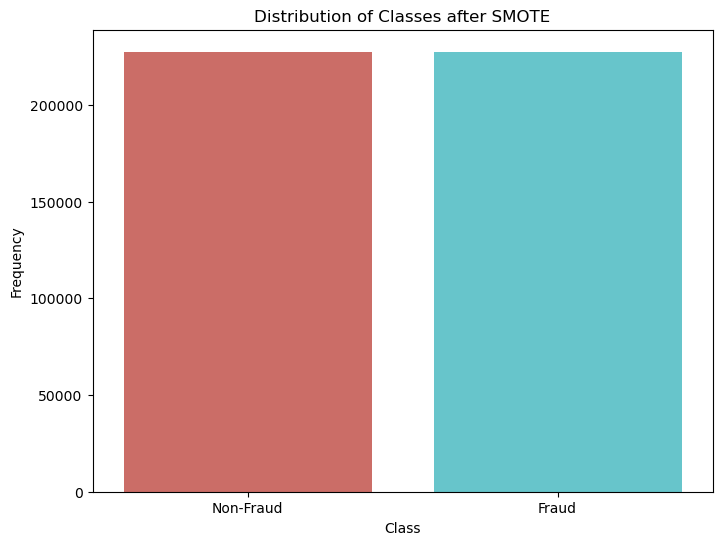

In [64]:
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, palette='hls')
plt.title('Distribution of Classes after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearnex import patch_sklearn
patch_sklearn()

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=300),
    'Naive Bayes': GaussianNB()
}

# Function to train and evaluate models
def train_eval_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Report': classification_report(y_test, y_pred)
        }
        print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}\n")
    return results

# Train and evaluate all models on the SMOTE-enhanced data
model_results = train_eval_models(models, X_train_smote_scaled, X_test_scaled, y_train_smote, y_test)


Logistic Regression - Accuracy: 0.983181770303009, Precision: 0.0873320537428023, Recall: 0.9285714285714286, F1 Score: 0.15964912280701754

Decision Tree - Accuracy: 0.9979459990871107, Precision: 0.44171779141104295, Recall: 0.7346938775510204, F1 Score: 0.5517241379310345

Random Forest - Accuracy: 0.9995962220427653, Precision: 0.9310344827586207, Recall: 0.826530612244898, F1 Score: 0.8756756756756757

Gradient Boosting - Accuracy: 0.9940662195849865, Precision: 0.21014492753623187, Recall: 0.8877551020408163, F1 Score: 0.33984374999999994

SVM - Accuracy: 0.9986482216214319, Precision: 0.5755395683453237, Recall: 0.8163265306122449, F1 Score: 0.6751054852320675

KNN - Accuracy: 0.9983848881710614, Precision: 0.5182926829268293, Recall: 0.8673469387755102, F1 Score: 0.648854961832061

Neural Network - Accuracy: 0.9992626663389628, Precision: 0.7745098039215687, Recall: 0.8061224489795918, F1 Score: 0.79

Naive Bayes - Accuracy: 0.9988062216916541, Precision: 0.6153846153846154, Re

Bonus:
# Feature extraction
>  filter methods, wrapper methods, and embedded methods
# explainable AI models
> LIME, SHAP, ELI5